<a href="https://colab.research.google.com/github/muhammad-naeem-tahir/Assignments/blob/main/PIAIC129482_Muhammad_Naeem_Tahir_Car_Price_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [444]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()


Saving CarPrice_Assignment.csv to CarPrice_Assignment (4).csv


In [447]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))

In [448]:
import tensorflow as tf

In [449]:
df2.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [450]:
df2.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

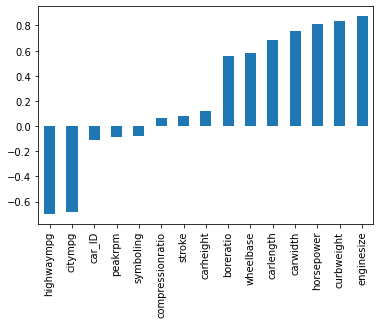

In [451]:
df2.corr()['price'].sort_values().drop('price').plot(kind='bar')

In [88]:
#df2.drop(columns = ['car_ID','CarName', 'peakrpm','symboling', 'compressionratio', 'stroke', 'carheight'], inplace= True)

In [452]:
df_new=df2[['car_ID', 'peakrpm','symboling', 'compressionratio', 'stroke', 'carheight','highwaympg','citympg','boreratio','wheelbase','carlength','carwidth','horsepower','enginesize','curbweight','price']]

In [453]:
cars=df_new.copy()

In [454]:
df2.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [325]:
#cars = pd.get_dummies(df2, columns=['symboling','fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'enginetype',	'cylindernumber',	'fuelsystem'])

In [455]:
cars.describe()

,car_ID,peakrpm,symboling,compressionratio,stroke,carheight,highwaympg,citympg,boreratio,wheelbase,carlength,carwidth,horsepower,enginesize,curbweight,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,5125.121951,0.834146,10.142537,3.255415,53.724878,30.751220,25.219512,3.329756,98.756585,174.049268,65.907805,104.117073,126.907317,2555.565854,13276.710571
std,59.322565,476.985643,1.245307,3.972040,0.313597,2.443522,6.886443,6.542142,0.270844,6.021776,12.337289,2.145204,39.544167,41.642693,520.680204,7988.852332
min,1.000000,4150.000000,-2.000000,7.000000,2.070000,47.800000,16.000000,13.000000,2.540000,86.600000,141.100000,60.300000,48.000000,61.000000,1488.000000,5118.000000
25%,52.000000,4800.000000,0.000000,8.600000,3.110000,52.000000,25.000000,19.000000,3.150000,94.500000,166.300000,64.100000,70.000000,97.000000,2145.000000,7788.000000
50%,103.000000,5200.000000,1.000000,9.000000,3.290000,54.100000,30.000000,24.000000,3.310000,97.000000,173.200000,65.500000,95.000000,120.000000,2414.000000,10295.000000
75%,154.000000,5500.000000,2.000000,9.400000,3.410000,55.500000,34.000000,30.000000,3.580000,102.400000,183.100000,66.900000,116.000000,141.000000,2935.000000,16503.000000
max,205.000000,6600.000000,3.000000,23.000000,4.170000,59.800000,54.000000,49.000000,3.940000,120.900000,208.100000,72.300000,288.000000,326.000000,4066.000000,45400.000000


In [218]:
x = cars.values
y = df2['price'].values

In [276]:
from sklearn.model_selection import train_test_split
train_ratio = 0.50
validation_ratio = 0.30
test_ratio = 0.20

# train is now 50% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

# test is now 30% of the initial data set
# validation is now 20% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [456]:
cars.shape

(205, 16)

In [457]:
np.random.seed(11111)
msk = np.random.rand(len(cars)) <= 0.50
train_total = cars[msk]
temp = cars[~msk]
msk1 = np.random.rand(len(temp)) <= 0.60
test_total = temp[msk1]
val_total = temp[~msk1]

In [396]:
print(len(train_total),len(test_total),len(val_total))

99 68 38


In [397]:
print(len(cars))

205


In [398]:
print(train_total.dtypes)

car_ID                int64
peakrpm               int64
symboling             int64
compressionratio    float64
stroke              float64
carheight           float64
highwaympg            int64
citympg               int64
boreratio           float64
wheelbase           float64
carlength           float64
carwidth            float64
horsepower            int64
enginesize            int64
curbweight            int64
price               float64
dtype: object


In [458]:
train_label = train_total.loc[:,'price']
test_label = test_total.loc[:,'price']
val_label = val_total.loc[:,'price']

In [459]:
test_data= test_total.drop(columns = ['price'])
train_data= train_total.drop(columns = ['price'])
val_data= val_total.drop(columns = ['price'])

In [460]:
train_data.shape


(99, 15)

In [461]:
{train_data.columns.get_loc(c): c for idx, c in enumerate(train_data.columns)}

{0: 'car_ID',
 1: 'peakrpm',
 2: 'symboling',
 3: 'compressionratio',
 4: 'stroke',
 5: 'carheight',
 6: 'highwaympg',
 7: 'citympg',
 8: 'boreratio',
 9: 'wheelbase',
 10: 'carlength',
 11: 'carwidth',
 12: 'horsepower',
 13: 'enginesize',
 14: 'curbweight'}

In [462]:
mean = train_data.iloc[:,0:14].mean(axis=0) # taking the mean of 
train_data.iloc[:,0:14] -= mean
std = train_data.iloc[:,0:14].std(axis=0)
train_data.iloc[:,0:14] /= std
test_data.iloc[:,0:14] -= mean
test_data.iloc[:,0:14] /= std
val_data.iloc[:,0:14] -= mean
val_data.iloc[:,0:14] /= std

In [463]:
mean_label = train_label.mean()
train_label -= mean_label
std_label = train_label.std()
train_label /= std_label
test_label -= mean_label
test_label /= std_label
val_label -= mean_label
val_label /= std_label

In [464]:
train = np.array(train_data.iloc[:]).astype(np.float32)
test = np.array(test_data.iloc[:]).astype(np.float32)
val = np.array(val_data.iloc[:]).astype(np.float32)

In [465]:
train.shape

(99, 15)

In [466]:
train_lab = np.array(train_label.astype(np.float32))
test_lab = np.array(test_label.astype('float32'))
val_lab = np.array(val_label.astype('float32'))

In [467]:
from keras import models
from keras import layers
def build_model(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError()])
  return model

In [468]:
# dropout model
from keras import regularizers
def build_model_drop(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [469]:
# Regularized model
from keras import regularizers
def build_model_regular(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(train.shape[1],)))
  model.add(layers.Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [470]:
model1=build_model('relu')

In [471]:
model1.summary()

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_265 (Dense)            (None, 10)                160       
_________________________________________________________________
dense_266 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_267 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_268 (Dense)            (None, 1)                 7         
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [472]:
train.reshape(99,15,1)

array([[[-1.5266631e+00],
        [-3.6672375e-01],
        [ 1.6501281e+00],
        ...,
        [ 1.8582125e-01],
        [ 1.4171742e-01],
        [ 2.5480000e+03]],

       [[-1.5106627e+00],
        [-3.6672375e-01],
        [ 3.2675806e-02],
        ...,
        [ 1.3372638e+00],
        [ 7.3873973e-01],
        [ 2.8230000e+03]],

       [[-1.4946623e+00],
        [ 7.3679149e-01],
        [ 8.4140199e-01],
        ...,
        [-5.5178363e-02],
        [-4.2816752e-01],
        [ 2.3370000e+03]],

       ...,

       [[ 1.6574137e+00],
        [ 5.1608843e-01],
        [-1.5847765e+00],
        ...,
        [ 2.6615447e-01],
        [ 4.4022858e-01],
        [ 2.9520000e+03]],

       [[ 1.7054149e+00],
        [-8.0812985e-01],
        [-1.5847765e+00],
        ...,
        [ 5.1932577e-02],
        [ 5.4877806e-01],
        [ 3.2170000e+03]],

       [[ 1.7214153e+00],
        [ 5.1608843e-01],
        [-1.5847765e+00],
        ...,
        [ 2.6615447e-01],
        [ 4.402

In [473]:
test.reshape(68,15,1)

array([[[-1.5426635e+00],
        [-3.6672375e-01],
        [ 1.6501281e+00],
        ...,
        [ 1.8582125e-01],
        [ 1.4171742e-01],
        [ 2.5480000e+03]],

       [[-1.3826597e+00],
        [ 1.3989006e+00],
        [ 8.4140199e-01],
        ...,
        [-8.1956096e-02],
        [-4.5530489e-01],
        [ 2.3950000e+03]],

       [[-1.3346585e+00],
        [-2.0219965e+00],
        [-7.7605039e-01],
        ...,
        [ 4.5359859e-01],
        [ 1.0643883e+00],
        [ 2.7650000e+03]],

       ...,

       [[ 1.6254129e+00],
        [-1.4602070e-01],
        [-2.3935027e+00],
        ...,
        [ 1.5514858e+00],
        [ 1.4171742e-01],
        [ 3.0450000e+03]],

       [[ 1.6734141e+00],
        [ 2.9538539e-01],
        [-1.5847765e+00],
        ...,
        [ 1.4979303e+00],
        [ 4.4022858e-01],
        [ 3.0490000e+03]],

       [[ 1.6894145e+00],
        [ 7.3679149e-01],
        [-1.5847765e+00],
        ...,
        [ 8.0170918e-01],
        [ 1.308

In [474]:
val.reshape(38,15,1)

array([[[-1.31865811e+00],
        [-2.02199650e+00],
        [ 3.26758064e-02],
        [-2.03468457e-01],
        [-2.97428995e-01],
        [ 9.38241720e-01],
        [-8.45181048e-01],
        [-7.62133420e-01],
        [-3.23101655e-02],
        [ 8.84558499e-01],
        [ 1.29749846e+00],
        [ 4.99616086e-01],
        [ 4.53598589e-01],
        [ 1.06438828e+00],
        [ 3.05500000e+03]],

       [[-1.25465655e+00],
        [-1.46020696e-01],
        [ 8.41401994e-01],
        [-5.11210263e-02],
        [-8.44297886e-01],
        [-1.14409342e-01],
        [ 3.37615585e+00],
        [ 3.37008309e+00],
        [-1.52008057e+00],
        [-1.73287320e+00],
        [-2.68881011e+00],
        [-2.58009291e+00],
        [-1.50117600e+00],
        [-1.73076165e+00],
        [ 1.48800000e+03]],

       [[-1.12665343e+00],
        [ 7.36791492e-01],
        [ 3.26758064e-02],
        [-8.15905109e-02],
        [-1.60711780e-01],
        [-1.20916641e+00],
        [ 1.11472535e+00

In [475]:
import numpy as np
history=model1.fit(
    train,
    train_lab,
    batch_size=1,
    epochs=100,
    validation_data=(val,val_lab)
)


Epoch 1/100
99/99 [==============================] - 1s 3ms/step - loss: 996765.0312 - mean_absolute_error: 943.3688 - val_loss: 104743.7891 - val_mean_absolute_error: 315.0963
Epoch 2/100
99/99 [==============================] - 0s 2ms/step - loss: 50548.5667 - mean_absolute_error: 193.1387 - val_loss: 3.8238 - val_mean_absolute_error: 1.7833
Epoch 3/100
99/99 [==============================] - 0s 2ms/step - loss: 5.6472 - mean_absolute_error: 1.6267 - val_loss: 2.0104 - val_mean_absolute_error: 1.0506
Epoch 4/100
99/99 [==============================] - 0s 2ms/step - loss: 10.1797 - mean_absolute_error: 2.0419 - val_loss: 1.0377 - val_mean_absolute_error: 0.6323
Epoch 5/100
99/99 [==============================] - 0s 2ms/step - loss: 17.0477 - mean_absolute_error: 2.3407 - val_loss: 1.3659 - val_mean_absolute_error: 1.0776
Epoch 6/100
99/99 [==============================] - 0s 2ms/step - loss: 10.3064 - mean_absolute_error: 1.8739 - val_loss: 2.9988 - val_mean_absolute_error: 1.2987

In [476]:
model_reg=build_model_regular('relu')
history_reg=model_reg.fit(
    train,
    train_lab,
    batch_size=1,
    epochs=500,
    validation_data=(val,val_lab)
)


Epoch 1/500
99/99 [==============================] - 1s 3ms/step - loss: 150942.9201 - mae: 367.5575 - val_loss: 10271.1592 - val_mae: 98.9259
Epoch 2/500
99/99 [==============================] - 0s 2ms/step - loss: 4332.7863 - mae: 58.5974 - val_loss: 1.3181 - val_mae: 0.7808
Epoch 3/500
99/99 [==============================] - 0s 2ms/step - loss: 2.6961 - mae: 1.1873 - val_loss: 1.4178 - val_mae: 0.6887
Epoch 4/500
99/99 [==============================] - 0s 2ms/step - loss: 2.5572 - mae: 1.0856 - val_loss: 1.3737 - val_mae: 0.7656
Epoch 5/500
99/99 [==============================] - 0s 2ms/step - loss: 1.1186 - mae: 0.7437 - val_loss: 1.3548 - val_mae: 0.7708
Epoch 6/500
99/99 [==============================] - 0s 2ms/step - loss: 0.9594 - mae: 0.7239 - val_loss: 1.3417 - val_mae: 0.7805
Epoch 7/500
99/99 [==============================] - 0s 2ms/step - loss: 0.8406 - mae: 0.6789 - val_loss: 1.3345 - val_mae: 0.7824
Epoch 8/500
99/99 [==============================] - 0s 2ms/step - 

In [478]:
model_dropout=build_model_drop('relu')
history_reg=model_dropout.fit(
    train,
    train_lab,
    batch_size=1,
    epochs=100,
    validation_data=(val,val_lab)
)

Epoch 1/100
99/99 [==============================] - 1s 3ms/step - loss: 65791.7582 - mae: 205.6283 - val_loss: 168.7310 - val_mae: 12.4638
Epoch 2/100
99/99 [==============================] - 0s 2ms/step - loss: 18500.2245 - mae: 83.5360 - val_loss: 15.3490 - val_mae: 3.8777
Epoch 3/100
99/99 [==============================] - 0s 2ms/step - loss: 8240.9734 - mae: 59.4559 - val_loss: 17.7889 - val_mae: 3.8382
Epoch 4/100
99/99 [==============================] - 0s 2ms/step - loss: 2797.3799 - mae: 29.4127 - val_loss: 42.0088 - val_mae: 6.0789
Epoch 5/100
99/99 [==============================] - 0s 2ms/step - loss: 3030.7872 - mae: 34.7671 - val_loss: 5.3797 - val_mae: 1.8942
Epoch 6/100
99/99 [==============================] - 0s 2ms/step - loss: 1658.7567 - mae: 27.5279 - val_loss: 1.5679 - val_mae: 1.1918
Epoch 7/100
99/99 [==============================] - 0s 2ms/step - loss: 543.6253 - mae: 15.6171 - val_loss: 2.3107 - val_mae: 0.9845
Epoch 8/100
99/99 [============================

In [479]:
test_mse_score, test_mae_score = model1.evaluate(test, test_lab)

3/3 [==============================] - 0s 5ms/step - loss: 0.1477 - mean_absolute_error: 0.2834


In [480]:
test_mse_score, test_mae_score = model_reg.evaluate(test, test_lab)

3/3 [==============================] - 0s 4ms/step - loss: 0.3267 - mae: 0.4527


In [481]:
test_mse_score, test_mae_score = model_dropout.evaluate(test, test_lab)

3/3 [==============================] - 0s 4ms/step - loss: 0.2938 - mae: 0.3474


In [483]:
x_1 = model1.predict(test[5].reshape(1,test.shape[1]))
x_1 * std_label + mean_label

array([[9880.022]], dtype=float32)

In [484]:
x_2 = model_reg.predict(test[5].reshape(1,test.shape[1]))
x_2 * std_label + mean_label

array([[10999.529]], dtype=float32)

In [485]:
x_3 = model_dropout.predict(test[5].reshape(1,test.shape[1]))
x_3 * std_label + mean_label

array([[8696.433]], dtype=float32)